## Analysis of StackOverflow Survey Results 2017

The purpose of this analysis is to investigate the following:
1. What are the most common jobs of professional developers
2. What are the best paying jobs for professional developers
3. what are the programming languages used for the most prominent job
4. How number of years of experience affect the distribution of salary
5. How the programming language used affect the distribution of salary

The modules in this repository are intended to include exploratory analysis on the relevant information pertaining to each question posed above

### Importing necessary packages

In [29]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
%matplotlib inline

### A Look at the Data

In order to carry on the analysis with the data proviedd it is necessary to have an idea of the column headers as they give an impression of the what information can be used for further analysis

In [2]:
data=pd.read_csv('survey_results_public.csv')
list(data.columns.values)

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

In [3]:
print(pd.read_csv('survey_results_schema.csv'))

                          Column  \
0                     Respondent   
1                   Professional   
2                   ProgramHobby   
3                        Country   
4                     University   
5               EmploymentStatus   
6                FormalEducation   
7                 MajorUndergrad   
8                     HomeRemote   
9                    CompanySize   
10                   CompanyType   
11                  YearsProgram   
12                 YearsCodedJob   
13             YearsCodedJobPast   
14                 DeveloperType   
15              WebDeveloperType   
16           MobileDeveloperType   
17              NonDeveloperType   
18            CareerSatisfaction   
19               JobSatisfaction   
20                 ExCoderReturn   
21               ExCoderNotForMe   
22                ExCoderBalance   
23                ExCoder10Years   
24               ExCoderBelonged   
25                 ExCoderSkills   
26            ExCoderWillNot

In [4]:
df=pd.DataFrame(data)

### How many respondents from each country has participated in the survey

##### In order to assess how many people from each country participated in the survey, the column 'Country' is analysed and is depicted as a countplot

Country 	 Number of users
United States         11455
India                  5197
United Kingdom         4395
Germany                4143
Canada                 2233
France                 1740
Poland                 1290
Australia               913
Russian Federation      873
Spain                   864
Name: Country, dtype: int64


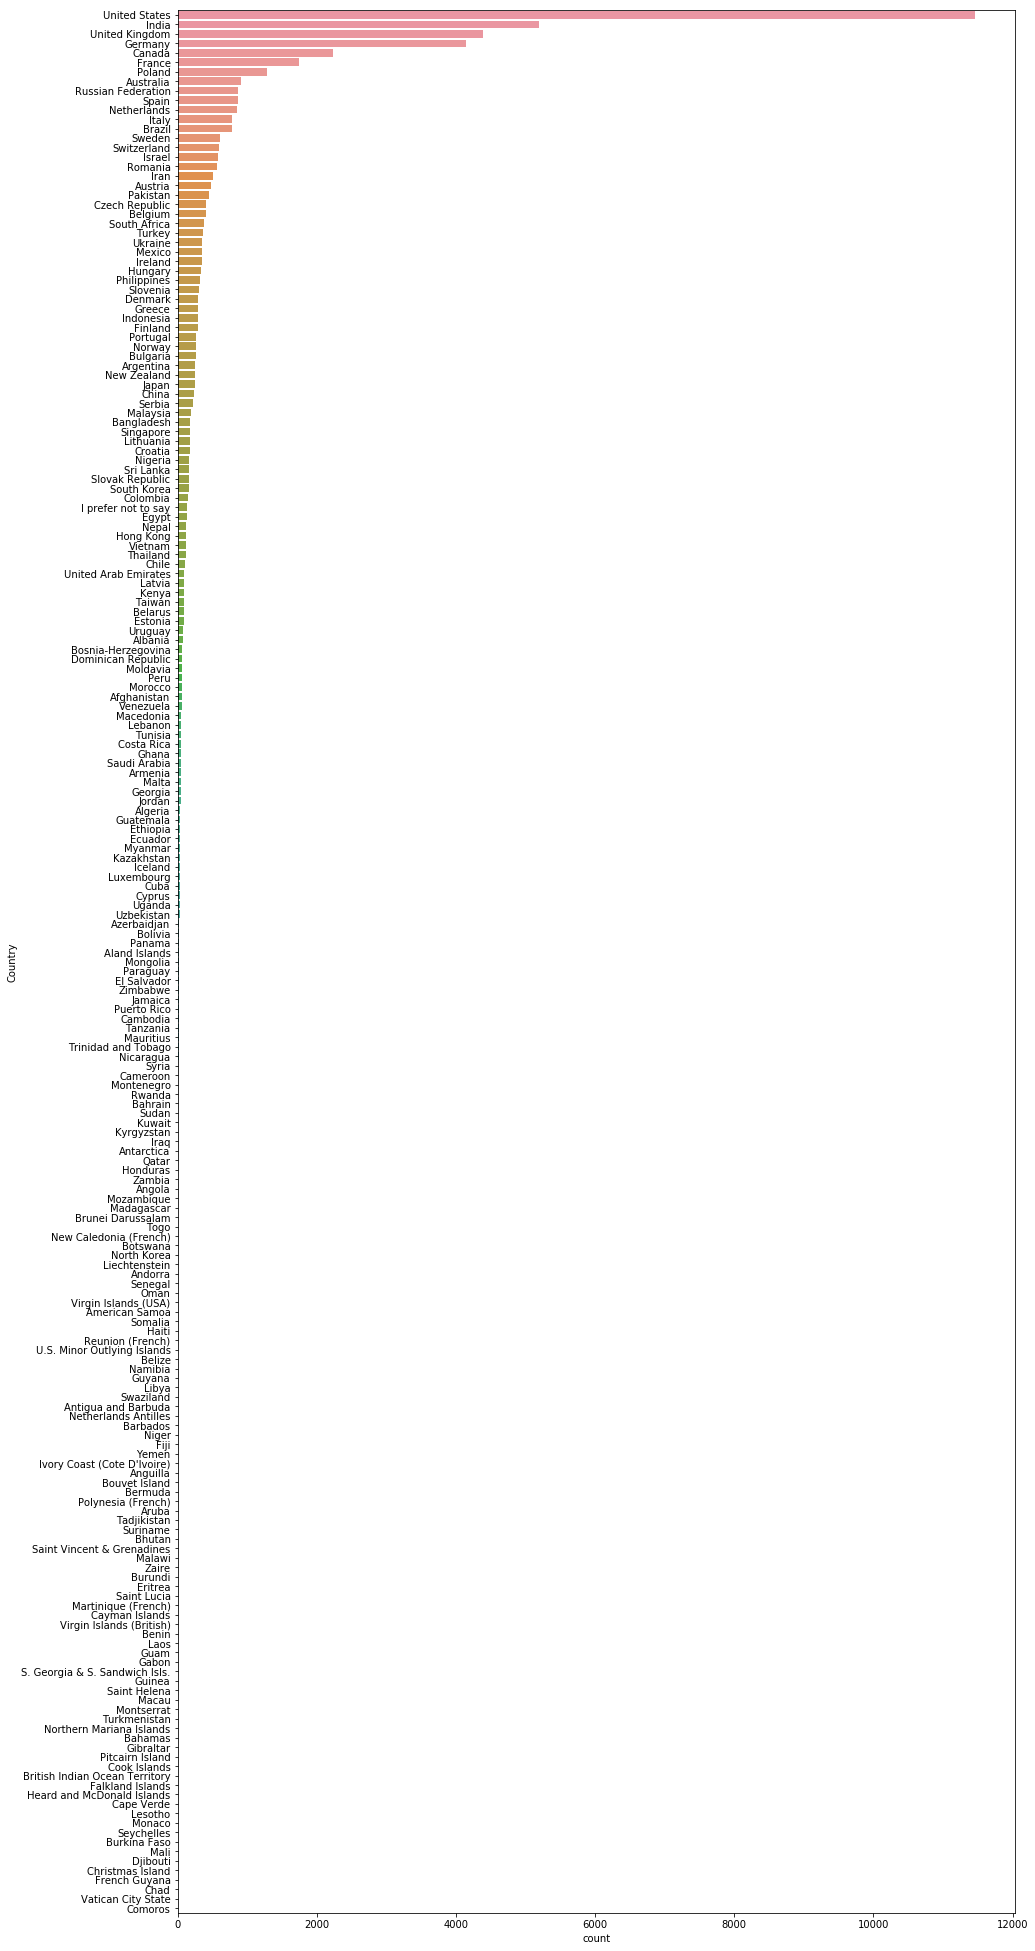

In [5]:
print("Country \t Number of users")
print(df['Country'].value_counts().nlargest(10))
plt.subplots(figsize=(15,35))
sns.countplot(y = df.Country, order = df.Country.value_counts().index)

#### According to the figure obtained above United States has the largest number of participinats for the survey.

### What are the most highly used programming languages

##### In order to assess the highly used programming language the column 'HaveWorkedLanguage' is analyzed

In [6]:
print("Language \t Number of users")
print(data['HaveWorkedLanguage'].value_counts().nlargest(10))
languageType = []
temp = data.HaveWorkedLanguage.drop(data.loc[data.HaveWorkedLanguage.isnull()].index)
for i in temp:
    if i is not None:
        types = i.replace(' ', '').split(";")
        languageType.extend(types)
list(Counter(languageType).most_common(10))

Language 	 Number of users
C#; JavaScript; SQL      1276
JavaScript; PHP; SQL     1143
Java                      913
JavaScript                807
JavaScript; PHP           662
Java; JavaScript; SQL     645
Java; JavaScript          585
C#                        540
Python                    529
C#; JavaScript            500
Name: HaveWorkedLanguage, dtype: int64


[('JavaScript', 22875),
 ('SQL', 18754),
 ('Java', 14524),
 ('C#', 12476),
 ('Python', 11704),
 ('PHP', 10290),
 ('C++', 8155),
 ('C', 6974),
 ('TypeScript', 3488),
 ('Ruby', 3324)]

####  As a part of data cleaning step, I have decided to drop the null values as removing observations will not affect the inferential statistics drawn from the data given. The same rationale is applied in the following cells dealing with missing values.

#### The cell above deals with the analysis of most common languages and the mean salary based on the language one has programmed with. Javascript seems to be most largely used.

In [34]:
def get_lang_data(lang_var, col_header, lang_val):
    """
    Function that gets ...
    Args:
        lang_var: programming language to be matched from the dataframe 
        col_header: 'HaveWorkedLanguage'
        lang_val: new column header based on the programming language provided as lang_var
    Returns:
        data[lang_var]: ...
    """
    data[lang_var] = data[col_header].apply(lambda x: lang_val in str(x).split('; '))
    return data[lang_var]

lang_var = ['c#_user', 'javascript_user', 'sql_user', 'java_user', 'python_user']
col_header = 'HaveWorkedLanguage'
lang_val = ['C#', 'JavaScript', 'SQL', 'Java', 'Python']
lang_idx = -1
for lang in lang_var:
    lang_idx += 1
    data[lang_var[lang_idx]] = get_lang_data(lang_var[lang_idx], col_header, lang_val[lang_idx])
    

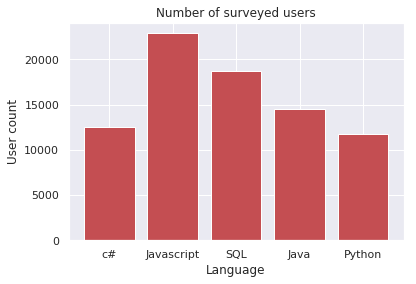

In [22]:
pal = sns.color_palette()

fig, ax = plt.subplots()
plt.xlabel('Language')
plt.ylabel('User count')
plt.title('Number of surveyed users')
plt.bar([0, 1, 2, 3, 4], [data['c#_user'].sum(), data['javascript_user'].sum(), data['sql_user'].sum(), data['java_user'].sum(), data['python_user'].sum()], color=pal[3])
ax.set_xticks([0, 1,2,3,4])
ax.set_xticklabels(('c#', 'Javascript', 'SQL', 'Java', 'Python'))
print()

### How is salary dependant on the programming language used

##### In order to analyse the relationship between salary and the programming language one has used we need to group the column 'Salary' based on the language used which has been obtained in the previous cell

Mean salary by language:
language
C#            58305.499895
Java          50635.552429
JavaScript    54929.947392
Neither       51316.506582
Python        66431.251978
SQL           55149.674974
Name: Salary, dtype: float64
Mean salary by Country:
Country
Afghanistan                     31133.691172
Albania                         41455.722763
Anguilla                       100000.000000
Argentina                       25771.287719
Armenia                         16785.714286
Australia                       69215.755208
Austria                         45299.012856
Azerbaidjan                      3500.000000
Bahrain                         75000.000000
Bangladesh                      21923.787850
Barbados                        30000.000000
Belarus                         23168.115845
Belgium                         39908.817204
Bermuda                        150000.000000
Bolivia                         13070.500000
Bosnia-Herzegovina              16095.238095
Botswana               

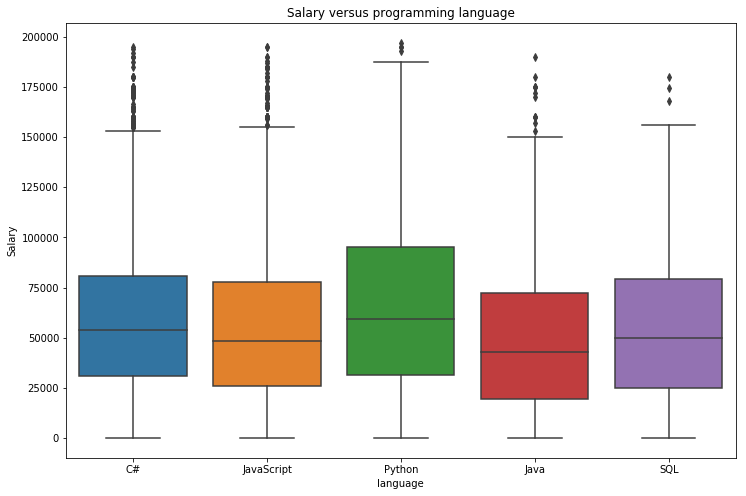

In [10]:
def langs_count(row):
    row = [int(i) for i in row.values]
    if row[0] == 1: return 'C#'
    elif row[1] == 1: return 'JavaScript'
    elif row[2] ==1: return 'Python'
    elif row[3] ==1: return 'Java'
    elif row[4] ==1: return 'SQL'
    else: return 'Neither'
    
data['language'] = data[['c#_user', 'javascript_user', 'python_user', 'java_user', 'sql_user']].apply(langs_count, axis =1)
plt.figure(figsize=(12, 8))
sns.boxplot(x="language", y="Salary", data=data, order = ['C#', 'JavaScript', 'Python', 'Java', 'SQL'])
plt.title('Salary versus programming language')
print('Mean salary by language:')
print(data.groupby('language')['Salary'].mean())

print('Mean salary by Country:')
temp_country_sal = data.groupby('Country')['Salary'].mean()
#temp_country_sal.Country.drop(temp_country_sal.loc[data.Salary.isnull()].index)
#print(data.groupby('Country')['Salary'].mean())
print(temp_country_sal.dropna())

#### Individuals using python language has a higher range of salary compared to the other commonly used languages viz, C#, javascript, java and sql.

### Lets analyse which study field has the majority of undergrads

##### In onder to analyse which study field has the majority of undergrads the column 'MajorUndergrad' is analysed

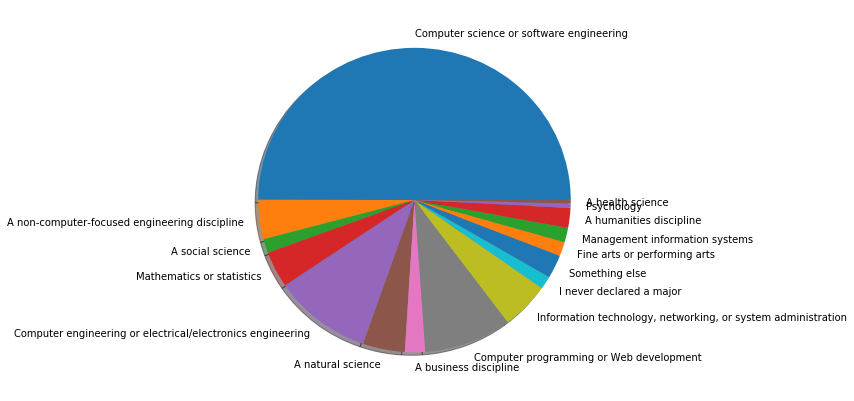

In [11]:
#majorundergrad
plt.subplots(figsize=(7,7))  
plt.pie(dict(Counter(data.MajorUndergrad.dropna())).values(),
        labels = dict(Counter(data.MajorUndergrad.dropna())).keys(),
        shadow = True,
        startangle = 0);

#### Majority of individuals have Computer science or software engineering as their undergraduate course.

### What are the most common and highly paying jobs 

##### In order to assess the most common and highly paying jobs  the column 'DeveloperType' is analysed

In [30]:
# compare counts of profession
developerType = []
temp = data.DeveloperType.drop(data.loc[data.DeveloperType.isnull()].index)
for i in temp:
    if i is not None:
        types = i.replace(' ', '').split(";")
        developerType.extend(types)
list(Counter(developerType).most_common(10))

[('Webdeveloper', 26235),
 ('Desktopapplicationsdeveloper', 10435),
 ('Mobiledeveloper', 8326),
 ('Databaseadministrator', 5192),
 ('Developerwithastatisticsormathematicsbackground', 4091),
 ('Systemsadministrator', 4086),
 ('DevOpsspecialist', 4015),
 ('Embeddedapplications/devicesdeveloper', 3352),
 ('Datascientist', 3045),
 ('Other', 2694)]

#### Webdeveloper being the most common job, lets analyse few aspects of the same

##### Question 1: How much the salry differs for web developers and other jobs

In [24]:
def get_dev_data(dev_var, col_header, dev_val):
    """
    Function that gets ...
    Args:
        dev_var: developerType to be matched from the dataframe 
        col_header: 'DeveloperType'
        dev_val: new column header based on the developerType provided as lang_var
    Returns:
        data[lang_var]: ...
    """
    data[lang_var] = data[col_header].apply(lambda x: lang_val in str(x).split('; '))
    return data[lang_var]

dev_var = ['Webdeveloper', 'Desktopapplicationsdeveloper', 'Mobiledeveloper', 'Databaseadministrator', 'Developerwithastatisticsormathematicsbackground']
col_header = 'DeveloperType'
dev_val = ['Web developer', 'Desktop applications developer', 'Mobile developer', 'Database administrator', 'Developer with a statistics or mathematics background']
dev_idx = -1
for dev in dev_var:
    dev_idx += 1
    data[dev_var[dev_idx]] = get_dev_data(dev_var[dev_idx], col_header, dev_val[dev_idx])

Mean salary by developer type:
develop
Databaseadministrator                              65589.895833
Desktopapplicationsdeveloper                       58209.296419
Developerwithastatisticsormathematicsbackground    66935.759930
Mobiledeveloper                                    44854.432586
Webdeveloper                                       54968.020118
Name: Salary, dtype: float64


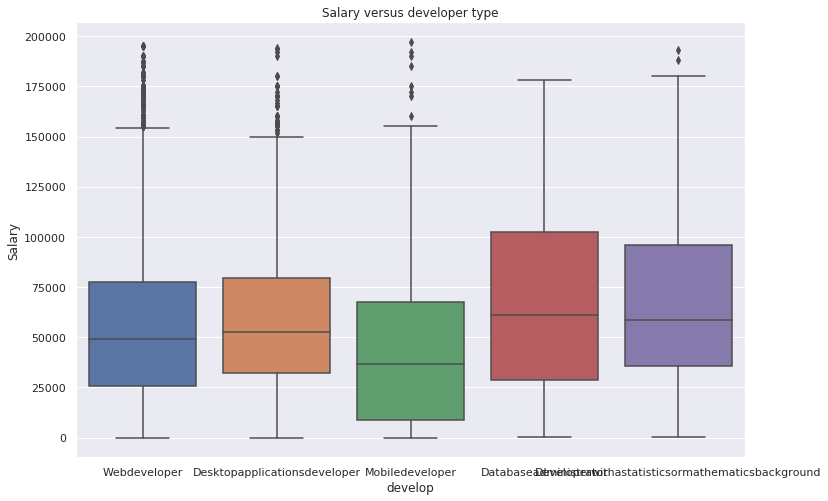

In [25]:
def developer_count(row):
    row = [int(i) for i in row.values]
    if row[0] == 1: return 'Webdeveloper'
    elif row[1] == 1: return 'Desktopapplicationsdeveloper'
    elif row[2] ==1: return 'Mobiledeveloper'
    elif row[3] ==1: return 'Databaseadministrator'
    elif row[4] ==1: return 'Developerwithastatisticsormathematicsbackground'
    
data['develop'] = data[['Webdeveloper', 'Desktopapplicationsdeveloper', 'Mobiledeveloper', 'Databaseadministrator', 'Developerwithastatisticsormathematicsbackground']].apply(developer_count, axis =1)
plt.figure(figsize=(12, 8))
sns.boxplot(x="develop", y="Salary", data=data, order = ['Webdeveloper', 'Desktopapplicationsdeveloper', 'Mobiledeveloper', 'Databaseadministrator', 'Developerwithastatisticsormathematicsbackground'])
plt.title('Salary versus developer type')
print('Mean salary by developer type:')
print(data.groupby('develop')['Salary'].mean())

#### Though webdeveloper has the maximum number of people working in it, on an average it earns lesser than Databaseadministrator .
Databaseadministrator : 65589.895833, Webdeveloper: 54968.020118

##### Question 2: What is the formal education of the most of the web developers

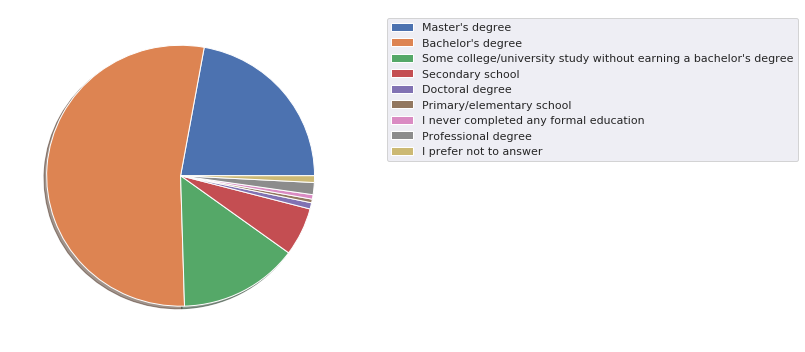

In [31]:
WebDevs = data.drop(data.loc[data.WebDeveloperType.isnull()].index)
#### first figure
plt.subplots(figsize=(6,6))  
plt.pie(dict(Counter(WebDevs.FormalEducation)).values(),
        shadow = True,
        startangle = 0);
plt.legend(list(WebDevs.FormalEducation.unique()),loc = 2, bbox_to_anchor=(1.1, 1))
plt.show()

#### People working as webdevelopers mostly seem to have a bachelor's degree while master's degree comes in the second place

##### Question 3: What do the webdevelopers think about building things and learning new technologies

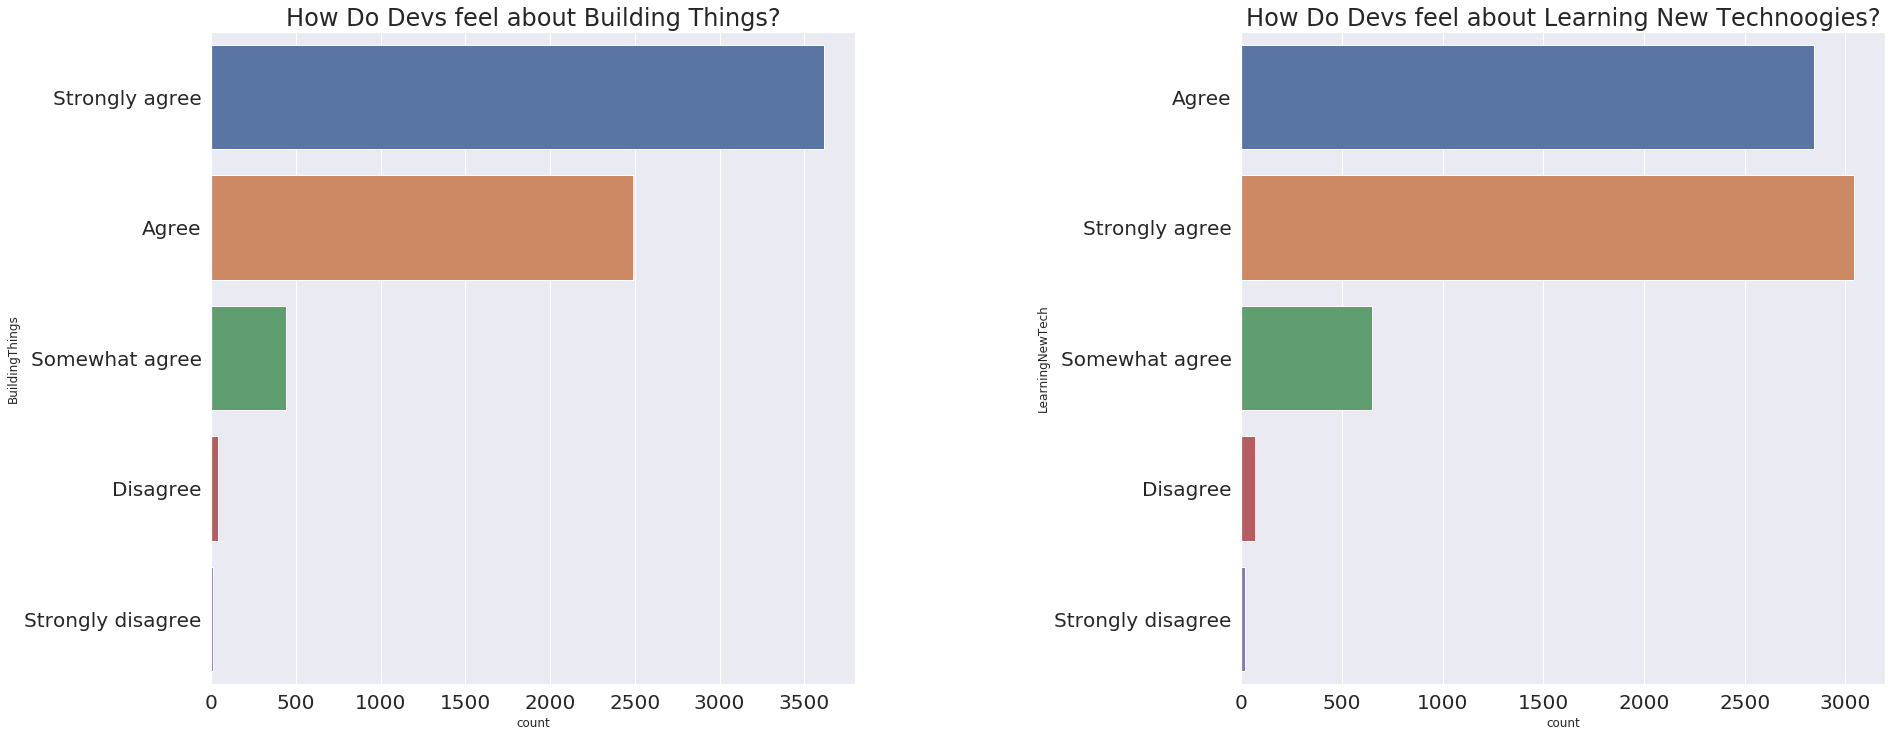

In [33]:
#building things and learning new technologies
fig,ax=plt.subplots(1,2,figsize=(30,12))
sns.set(font_scale=2)

temp = WebDevs.drop(WebDevs.loc[WebDevs.BuildingThings.isnull()].index)
sns.countplot(y = temp.BuildingThings, ax=ax[0], label = 'big')
ax[0].set_title('How Do Devs feel about Building Things?')

temp = WebDevs.drop(WebDevs.loc[WebDevs.LearningNewTech.isnull()].index)
sns.countplot(y = temp.LearningNewTech, ax=ax[1])
ax[1].set_title('How Do Devs feel about Learning New Technoogies?')

plt.subplots_adjust(hspace=0.1,wspace=0.6)
ax[0].tick_params(labelsize=20)
ax[1].tick_params(labelsize=20)
plt.show()

##### Question 4: How is the three parts of webdevelopment field viz. front-end, back-end and full-stack developer differs in terms of count and salary?

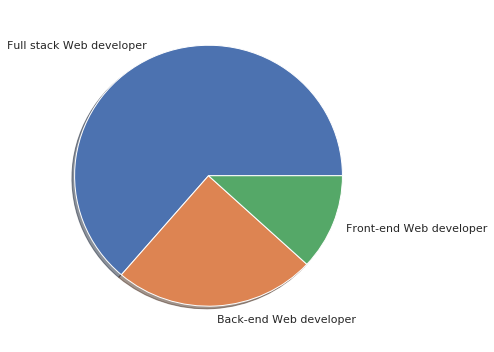

In [13]:
sns.set(font_scale=1)
#sns.countplot(y = data.WebDeveloperType, order = data.WebDeveloperType.value_counts().index);
plt.subplots(figsize=(6,6))  
plt.pie(dict(Counter(WebDevs.WebDeveloperType)).values(),
        labels = list(WebDevs.WebDeveloperType.unique()),
        shadow = True,
        startangle = 0);

In [14]:
print(df['WebDeveloperType'].value_counts())

Full stack Web developer    6816
Back-end Web developer      2610
Front-end Web developer     1270
Name: WebDeveloperType, dtype: int64


Mean salary by WebDeveloperType
WebDeveloperType
Back-end Web developer      51103.242190
Front-end Web developer     51236.587277
Full stack Web developer    55237.946123
Name: Salary, dtype: float64


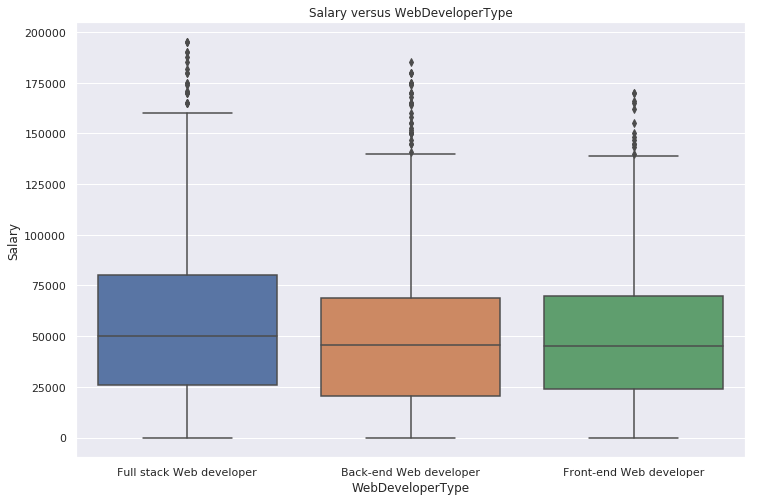

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="WebDeveloperType", y="Salary", data=data)
plt.title('Salary versus WebDeveloperType')
print('Mean salary by WebDeveloperType')
print(data.groupby('WebDeveloperType')['Salary'].mean())

#### It has been observed that full-stack web developer has maximum number of people working in that field and it draws quite a considerably higher salary than front-end and back-end web developer

### Irrespective of the types of jobs lets analyse if the number of years of experience really matters for the salary

YearsProgram
1 to 2 years        33952.955892
10 to 11 years      48056.752718
11 to 12 years      54866.916054
12 to 13 years      55753.347727
13 to 14 years      57149.324680
14 to 15 years      63487.522662
15 to 16 years      62791.031631
16 to 17 years      63898.935647
17 to 18 years      73085.731295
18 to 19 years      71599.061950
19 to 20 years      73926.990204
2 to 3 years        31997.480185
20 or more years    84564.967771
3 to 4 years        37686.091623
4 to 5 years        37220.203860
5 to 6 years        39585.967627
6 to 7 years        41112.825421
7 to 8 years        42798.492890
8 to 9 years        45788.562715
9 to 10 years       48603.051609
Less than a year    24673.256855
Name: Salary, dtype: float64


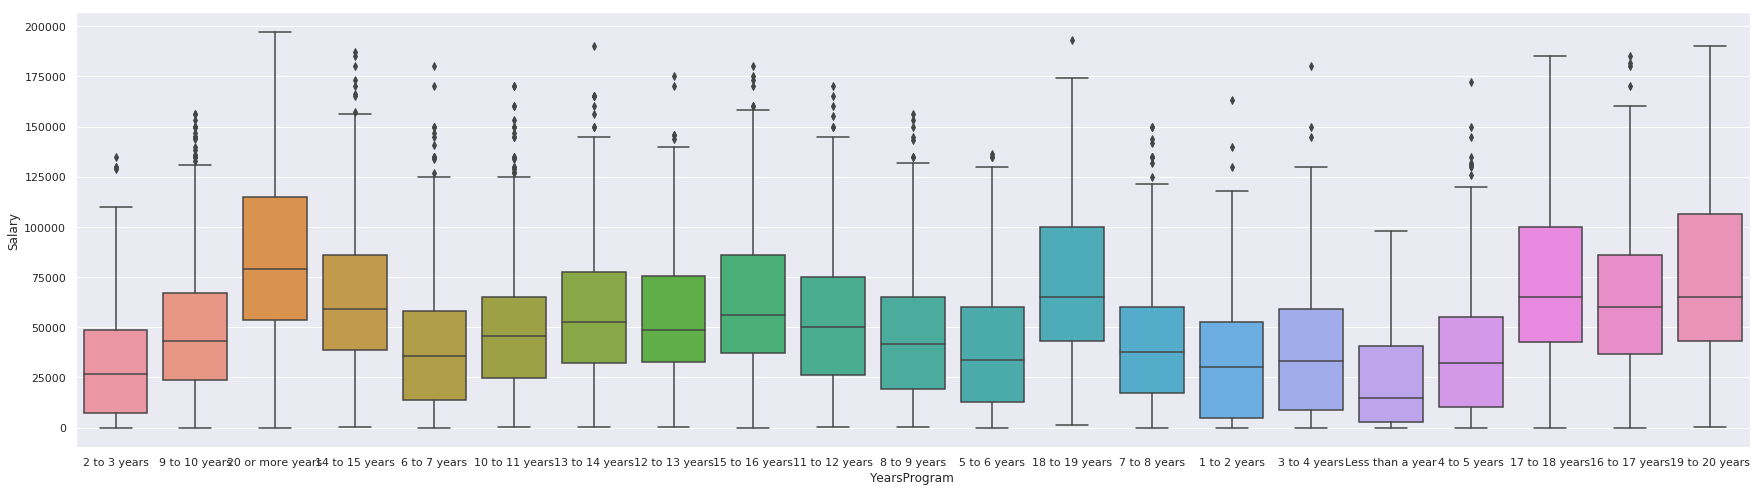

In [19]:
print(data.groupby('YearsProgram')['Salary'].mean())
plt.figure(figsize=(30, 8))
sns.boxplot(x="YearsProgram", y="Salary", data=data)


#### It has been observed that people with 20 or more years of experience earns the highest